<a href="https://colab.research.google.com/github/Diego-Silvera/Proyecto_Delivery-_Amazon-/blob/main/Pre_entrega_Proyecto_Final_Diego_Silvera1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
El análisis de datos es clave en la logística moderna, especialmente para empresas como Amazon, donde la velocidad y eficiencia son esenciales. Este proyecto explora los datos de entrega de Amazon para identificar patrones y proponer mejoras prácticas. Desde factores como el tráfico y el clima hasta la calificación de los agentes, buscamos entender y optimizar los tiempos de entrega.



# Datos Generales
El dataset contiene información relevante sobre el proceso de entrega, incluyendo detalles como:

1.Datos geográficos: Latitud y longitud de la tienda y el destino.
Condiciones externas: Clima y tráfico.
Características del agente: Edad y calificación.
Tiempos asociados: Fecha y hora del pedido, recogida y entrega.
Esta variedad de variables permite explorar tanto aspectos operativos como externos que influyen en la logística de entregas.

1. Datos geográficos: Latitud y longitud de la tienda y el destino.
2. Condiciones externas: Clima y tráfico..
3. Tiempos asociados: Fecha y hora del pedido, recogida y entrega.

Esta variedad de variables permite explorar tanto aspectos operativos como externos que influyen en la logística de entregas.


#Hipótesis
H1: El tráfico y el clima adverso incrementan significativamente los tiempos de entrega.

H2: Agentes con mejores calificaciones tienen tiempos de entrega más rápidos.

H3: Las distancias más largas, determinadas por las coordenadas geográficas, aumentan los tiempos de entrega.


# Objetivos
1. Realizar un análisis exploratorio para comprender las principales características del dataset.
2. Identificar los factores más relevantes que afectan los tiempos de entrega.
3. Desarrollar modelos predictivos para estimar el tiempo de entrega.
4. Proponer recomendaciones para mejorar la eficiencia logística.

#Elección del Dataset
El dataset de Amazon Delivery fue seleccionado por su riqueza en variables clave para el análisis logístico y su alineación con los objetivos del proyecto.
Este conjunto de datos permitirá analizar la relación entre las características del pedido, las condiciones externas y los tiempos de entrega.

#Variables y su descripción


1.   Edad del Agente (Edad), Categoría: Numérica continua, int (número entero).

2.  Calificación del Agente, Categoría: Numérica continua, float (número decimal).

3.   Latitud de la Tienda, Categoría: Numérica continua, float (número decimal).

4.   Longitud de la Tienda, Categoría: Numérica continua, float (número decimal).

5.  Latitud de Entrega, Categoría: Numérica continua, float (número decimal).

6.  Longitud de Entrega, Categoría: Numérica continua, float (número decimal).

7.  Fecha del Pedido, Categoría: Temporal, datetime (formato de fecha).
8.  Hora del Pedido, Categoría: Temporal, datetime.time (hora específica).

9.  Hora de Recogida, Categoría: Temporal, datetime.time (hora específica).

10.  Clima, Categoría: Categórica, str (cadena de texto).

11.  Tráfico, Categoría: Categórica, str (cadena de texto).

12.  Vehículo, Categoría: Categórica, str (cadena de texto).

13.  Área, Categoría: Categórica, str (cadena de texto).

14.  Tiempo de Entrega, Categoría: Numérica continua, int (número entero).

15.  Categoría, Categoría: Categórica, str (cadena de texto).




# Elección del Dataset
El dataset fue seleccionado por su riqueza en variables relevantes, como datos geográficos, condiciones externas y características del agente, permitiendo un análisis integral del proceso de entrega.

# Importación de bibliotecas necesarias  222


In [79]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from geopy.distance import geodesic  # Para calcular distancias geográficas




In [3]:
# Lectura del dataset
url = 'https://raw.githubusercontent.com/Diego-Silvera/Proyecto_Delivery-_Amazon-/refs/heads/main/amazon_delivery.csv'  # Reemplazar con la ruta correcta del dataset
df = pd.read_csv(url, sep=',', header=None)

# Mostrar las primeras filas del dataset
df.head()

<ipython-input-3-de8aab2d20f1>:3: DtypeWarning: Columns (1,2,3,4,5,6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=',', header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
1,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
2,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
3,njpu434582536,23,4.4,12.914264,77.6784,12.924264,77.6884,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
4,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43740 entries, 0 to 43739
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       43740 non-null  object
 1   1       43740 non-null  object
 2   2       43686 non-null  object
 3   3       43740 non-null  object
 4   4       43740 non-null  object
 5   5       43740 non-null  object
 6   6       43740 non-null  object
 7   7       43740 non-null  object
 8   8       43740 non-null  object
 9   9       43740 non-null  object
 10  10      43649 non-null  object
 11  11      43740 non-null  object
 12  12      43740 non-null  object
 13  13      43740 non-null  object
 14  14      43740 non-null  object
 15  15      43740 non-null  object
dtypes: object(16)
memory usage: 5.3+ MB


In [5]:
df.shape

(43740, 16)

#Lista de Variables
       
0. Orden_ID - ID_Orden
1.   Agent_Age - Edad del Agente
2.   Agent_Rating -Clasificación del Agente
3.   Store_Latitude - Latitud de la Tienda
4. Store_Longitude - Longitud de la Tienda
5. Drop_Latitude - Latitud de la Entrada
6. Drop_Longitude - Longitud de la Entrada
7. Order_Date - Fecha del Pedido
8. Order_Time - Hora del Pedido
9. Pickup_Time - Hora de Recogida
10. Weather - Clima
11. Traffic - Trafico
12. Vehicle - Vehículo
13. Area - Área
14. Delivery_Time - Tiempo de Entrega
15. Category - Categoría

La Variable ID_Orden esta compuesta por Letras y Números, puede entenderse como erronea. Para mejorar eso vamos a crear una columna  Autonumerica.

In [6]:
# Asignar valores autonuméricos a la columna 'Order_ID'
df['Order_ID'] = range(1, len(df) + 1)
print(df)

                   0          1             2               3  \
0           Order_ID  Agent_Age  Agent_Rating  Store_Latitude   
1      ialx566343618         37           4.9       22.745049   
2      akqg208421122         34           4.5       12.913041   
3      njpu434582536         23           4.4       12.914264   
4      rjto796129700         38           4.7       11.003669   
...              ...        ...           ...             ...   
43735  jlxf819993117         30           4.8       26.902328   
43736  aevx342135787         21           4.6             0.0   
43737  xnek760674819         30           4.9       13.022394   
43738  cynl434665991         20           4.7       11.001753   
43739  nsyz997960170         23           4.9       23.351058   

                     4              5               6           7           8  \
0      Store_Longitude  Drop_Latitude  Drop_Longitude  Order_Date  Order_Time   
1            75.892471      22.765049       75.912471  20

In [7]:
df_new = df.drop(columns=[0])
print(df_new)

               1             2               3                4  \
0      Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude   
1             37           4.9       22.745049        75.892471   
2             34           4.5       12.913041        77.683237   
3             23           4.4       12.914264          77.6784   
4             38           4.7       11.003669        76.976494   
...          ...           ...             ...              ...   
43735         30           4.8       26.902328        75.794257   
43736         21           4.6             0.0              0.0   
43737         30           4.9       13.022394        80.242439   
43738         20           4.7       11.001753        76.986241   
43739         23           4.9       23.351058        85.325731   

                   5               6           7           8            9  \
0      Drop_Latitude  Drop_Longitude  Order_Date  Order_Time  Pickup_Time   
1          22.765049       75.912471  202

In [8]:
#con esto Elimino el ID de la Orden
df = df_new.drop(columns=['Order_ID'])
print(df)

               1             2               3                4  \
0      Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude   
1             37           4.9       22.745049        75.892471   
2             34           4.5       12.913041        77.683237   
3             23           4.4       12.914264          77.6784   
4             38           4.7       11.003669        76.976494   
...          ...           ...             ...              ...   
43735         30           4.8       26.902328        75.794257   
43736         21           4.6             0.0              0.0   
43737         30           4.9       13.022394        80.242439   
43738         20           4.7       11.001753        76.986241   
43739         23           4.9       23.351058        85.325731   

                   5               6           7           8            9  \
0      Drop_Latitude  Drop_Longitude  Order_Date  Order_Time  Pickup_Time   
1          22.765049       75.912471  202


Como la columna ID_Orden no era necesaria para identificar las filas ya qeu los DataFrames de Pandas tienen un identificador generado automáticamente llamado  **Índice**, se elimino dicha Columna, con el fin de hacer más agíl su procesamiento.



In [9]:
# Contar el número de valores igual a 0 en las columnas 1, 2, 3, 4 y 5
columns_to_check = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Contar los valores iguales a 0
nun_missing = (df[columns_to_check] == 0).sum()

# Mostrar el resultado
print(nun_missing)

1       0
2       0
3     892
4     892
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
dtype: int64


In [18]:
print(df.columns)

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='object')


# Renombrar las columnas para mayor claridad
**Verificar las primeras filas para confirmar el renombramiento**

In [14]:
df.columns = ["Agent_Age", "Agent_Rating", "Store_Latitude", "Store_Longitude",
    "Drop_Latitude", "Drop_Longitude", "Order_Date", "Order_Time",
    "Pickup_Time", "Weather", "Traffic", "Vehicle", "Area",
    "Delivery_Time", "Category"]
df.head()


,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
1,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
2,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
3,23,4.4,12.914264,77.6784,12.924264,77.6884,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
4,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics


# Limpieza inicial: detectar valores faltantes

In [15]:
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64


# Eliminación de filas con valores faltantes

In [16]:
df_cleaned = df.dropna()

# Confirmar la limpieza de datos

In [17]:
missing_values_cleaned = df_cleaned.isnull().sum()
print("\nDespués de la limpieza:")
print(missing_values_cleaned)


Después de la limpieza:
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


# Verificación de datos numéricos y sus tipos

In [20]:
print("\nInformación del DataFrame:")
print(df_cleaned.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 43595 entries, 0 to 43739
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Agent_Age        43595 non-null  object
 1   Agent_Rating     43595 non-null  object
 2   Store_Latitude   43595 non-null  object
 3   Store_Longitude  43595 non-null  object
 4   Drop_Latitude    43595 non-null  object
 5   Drop_Longitude   43595 non-null  object
 6   Order_Date       43595 non-null  object
 7   Order_Time       43595 non-null  object
 8   Pickup_Time      43595 non-null  object
 9   Weather          43595 non-null  object
 10  Traffic          43595 non-null  object
 11  Vehicle          43595 non-null  object
 12  Area             43595 non-null  object
 13  Delivery_Time    43595 non-null  object
 14  Category         43595 non-null  object
dtypes: object(15)
memory usage: 5.3+ MB
None


# Preparación del Data Frame para Gráficos

In [21]:
plt.style.use('ggplot')

In [36]:
df_temp = df_cleaned.copy()
df_temp['Traffic'] = df_temp['Traffic'].astype(str).str.strip()  # Asegurar que todos los valores sean cadenas

df_temp.head()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
1,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
2,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
3,23,4.4,12.914264,77.6784,12.924264,77.6884,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
4,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics


In [39]:
df_cleaned['Traffic'] = df_cleaned['Traffic'].astype(str)



<ipython-input-39-8430aa05cad6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Traffic'] = df_cleaned['Traffic'].astype(str)


In [44]:
#Revisar los valores únicos en la columna 'Traffic'
print("Valores únicos en 'Traffic' antes de la conversión:")
print(df_cleaned['Traffic'].unique())


Valores únicos en 'Traffic' antes de la conversión:
['Traffic' 'High' 'Jam' 'Low' 'Medium']


In [47]:
# Verificar valores únicos en 'Traffic'
print("Valores únicos en 'Traffic':")
print(df_cleaned['Traffic'].unique())

Valores únicos en 'Traffic':
['Traffic' 'High' 'Jam' 'Low' 'Medium']


In [48]:
# Verificar si hay valores nulos
print("\nValores nulos en 'Traffic':")
print(df_cleaned['Traffic'].isnull().sum())


Valores nulos en 'Traffic':
0


In [49]:
# Revisar el tipo de datos de la columna
print("\nTipo de datos de 'Traffic':", df_cleaned['Traffic'].dtype)


Tipo de datos de 'Traffic': object


In [51]:
# Opcional: Reemplazar valores nulos o inconsistentes con 'Unknown'
df_cleaned['Traffic'] = df_cleaned['Traffic'].replace(['nan', 'None', 'NaN'], 'Unknown')


<ipython-input-51-c0e7936920f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Traffic'] = df_cleaned['Traffic'].replace(['nan', 'None', 'NaN'], 'Unknown')


In [52]:
# Usar .loc para realizar cambios de manera explícita
df_cleaned.loc[:, 'Traffic'] = df_cleaned['Traffic'].replace(['nan', 'None', 'NaN'], 'Unknown')

In [53]:
# Verificar valores únicos después de limpieza
print("Valores únicos en 'Traffic' después de limpieza:")
print(df_cleaned['Traffic'].unique())

Valores únicos en 'Traffic' después de limpieza:
['Traffic' 'High' 'Jam' 'Low' 'Medium']


In [62]:
print(df_cleaned['Traffic'].value_counts())  # Revisar categorías de tráfico
print(df_cleaned['Delivery_Time'].describe())  # Verificar los valores de tiempo de entrega


Traffic
Low        14976
Jam        13710
Medium     10614
High        4294
Traffic        1
Name: count, dtype: int64
count     43595
unique      178
top         130
freq       1424
Name: Delivery_Time, dtype: object


In [64]:
# Reemplazar el valor inválido en 'Traffic' con 'Unknown'
df_cleaned.loc[:, 'Traffic'] = df_cleaned['Traffic'].replace('Traffic', 'Unknown')

# Verificar nuevamente los valores únicos
print("Valores únicos en 'Traffic' después de limpieza:")
print(df_cleaned['Traffic'].unique())

Valores únicos en 'Traffic' después de limpieza:
['Unknown' 'High' 'Jam' 'Low' 'Medium']


In [65]:
# Convertir 'Delivery_Time' a formato numérico
df_cleaned.loc[:, 'Delivery_Time'] = pd.to_numeric(df_cleaned['Delivery_Time'], errors='coerce')

In [66]:
# Eliminar filas con valores NaN en 'Delivery_Time'
df_cleaned = df_cleaned.dropna(subset=['Delivery_Time'])




In [86]:
# Asegurarse de que 'Agent_Rating' y 'Delivery_Time' sean numéricos
df_cleaned['Agent_Rating'] = pd.to_numeric(df_cleaned['Agent_Rating'], errors='coerce')
df_cleaned['Delivery_Time'] = pd.to_numeric(df_cleaned['Delivery_Time'], errors='coerce')

In [87]:
# Eliminar filas con valores NaN en estas columnas
df_cleaned = df_cleaned.dropna(subset=['Agent_Rating', 'Delivery_Time'])

In [88]:
# Asegurarse de que 'Agent_Rating' y 'Delivery_Time' sean numéricos
df_cleaned['Agent_Rating'] = pd.to_numeric(df_cleaned['Agent_Rating'], errors='coerce')
df_cleaned['Delivery_Time'] = pd.to_numeric(df_cleaned['Delivery_Time'], errors='coerce')

In [89]:
# Función para calcular la distancia geográfica
def calculate_distance(row):
    try:
        # Coordenadas de inicio y fin
        start = (row['Store_Latitude'], row['Store_Longitude'])
        end = (row['Drop_Latitude'], row['Drop_Longitude'])
        return geodesic(start, end).km  # Retorna la distancia en kilómetros
    except ValueError:
        return None  # En caso de datos inválidos, retorna None

In [90]:
# Eliminar filas con valores NaN en estas columnas
df_cleaned = df_cleaned.dropna(subset=['Agent_Rating', 'Delivery_Time'])

In [92]:
# Conversión de columnas de latitud y longitud a valores numéricos
columns_to_convert = ['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']
for col in columns_to_convert:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

In [93]:
# Función para calcular la distancia
def calculate_distance(row):
    try:
        start = (row['Store_Latitude'], row['Store_Longitude'])
        end = (row['Drop_Latitude'], row['Drop_Longitude'])
        return geodesic(start, end).km  # Distancia en kilómetros
    except ValueError:
        return None

In [94]:
# Aplicar la función para calcular la distancia
df_cleaned['Distance'] = df_cleaned.apply(calculate_distance, axis=1)

In [95]:
# Eliminar filas con valores NaN en 'Distance' o 'Delivery_Time'
df_cleaned = df_cleaned.dropna(subset=['Distance', 'Delivery_Time'])

# Mostrar las primeras filas del DataFrame limpio
print(df_cleaned.head())

  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  Drop_Latitude  \
1        37           4.9       22.745049        75.892471      22.765049   
2        34           4.5       12.913041        77.683237      13.043041   
3        23           4.4       12.914264        77.678400      12.924264   
4        38           4.7       11.003669        76.976494      11.053669   
5        32           4.6       12.972793        80.249982      13.012793   

   Drop_Longitude  Order_Date Order_Time Pickup_Time     Weather Traffic  \
1       75.912471  2022-03-19   11:30:00    11:45:00       Sunny    High   
2       77.813237  2022-03-25   19:45:00    19:50:00      Stormy     Jam   
3       77.688400  2022-03-19   08:30:00    08:45:00  Sandstorms     Low   
4       77.026494  2022-04-05   18:00:00    18:10:00       Sunny  Medium   
5       80.289982  2022-03-26   13:30:00    13:45:00      Cloudy    High   

       Vehicle            Area  Delivery_Time     Category   Distance  
1  motor

#Análisis y Visualización
**Conclusiones y Recomendacionespor gráfico**





#1- Distribución del tiempo de entrega por tráfico



<ipython-input-67-7704c07233d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


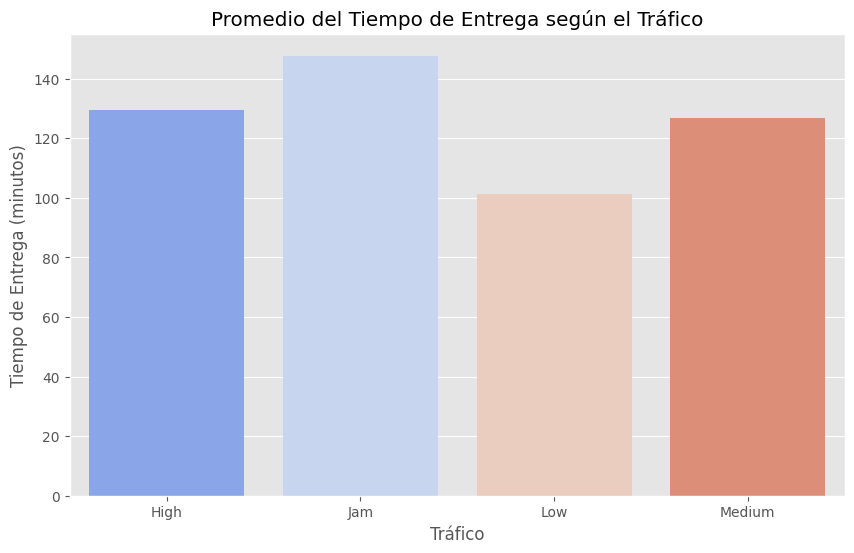

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Traffic',
    y='Delivery_Time',
    data=df_cleaned,
    errorbar=None,
    palette="coolwarm"
)
plt.title('Promedio del Tiempo de Entrega según el Tráfico')
plt.xlabel('Tráfico')
plt.ylabel('Tiempo de Entrega (minutos)')
plt.show()

#Análisis del Gráfico 1: Distribución del Tiempo de Entrega según el Tráfico.

**Conclusión**

Los tiempos de entrega son más altos y variables en tráfico "alto" y "atascos". En contraste, tráfico "bajo" y "medio" presentan tiempos más consistentes y bajos. La congestión del tráfico tiene un impacto significativo en los tiempos de entrega. Las categorías con "Jam" y "High" tráfico muestran los tiempos de entrega promedio más altos, mientras que "Low" tráfico está asociado con tiempos más bajos. Esto refleja cómo la intensidad del tráfico ralentiza las entregas.


**Recomendación**  

Implementar algoritmos de predicción para optimizar rutas y evitar zonas de tráfico denso.Implementar sistemas de planificación de rutas dinámicos para optimizar las entregas en horarios de menor tráfico.

#2: Impacto del Clima en el Tiempo de Entrega


<ipython-input-68-28e0a8f9fa5e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather', y='Delivery_Time', data=df_cleaned, palette="coolwarm")


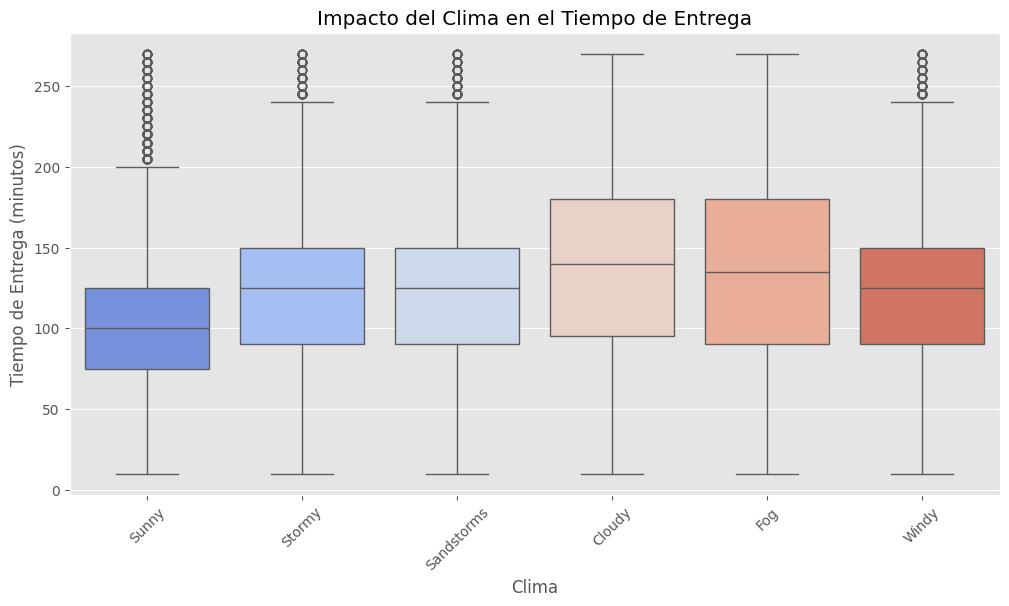

In [68]:
# Impacto del clima en el tiempo de entrega
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather', y='Delivery_Time', data=df_cleaned, palette="coolwarm")
plt.title('Impacto del Clima en el Tiempo de Entrega')
plt.xlabel('Clima')
plt.ylabel('Tiempo de Entrega (minutos)')
plt.xticks(rotation=45)
plt.show()

#Análisis Completado Grafico 2: Impacto del Clima en el Tiempo de Entrega

**Conclusión**

Los climas adversos, como tormentas y niebla, incrementan significativamente los tiempos de entrega y su variabilidad. Las condiciones soleadas muestran tiempos más rápidos y consistentes.Los climas extremos parecen provocar más retrasos en comparación con condiciones normales.

 **Recomendación**

Establecer políticas flexibles y una comunicación proactiva con los clientes para manejar las expectativas durante climas adversos.Adaptar las rutas y tiempos según las condiciones meteorológicas e incorporar alertas en tiempo real para prever retrasos debido al clima.

#3: Relación entre la Calificación del Agente y el Tiempo de Entrega



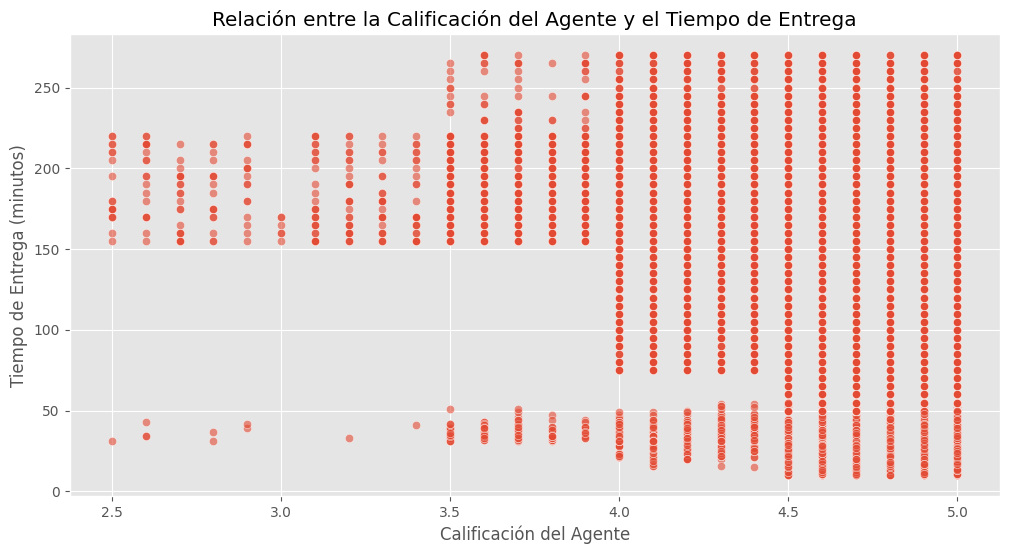

In [91]:
# Relación entre la calificación del agente y el tiempo de entrega
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Agent_Rating', y='Delivery_Time', data=df_cleaned, alpha=0.6)
plt.title('Relación entre la Calificación del Agente y el Tiempo de Entrega')
plt.xlabel('Calificación del Agente')
plt.ylabel('Tiempo de Entrega (minutos)')
plt.show()

#Análisis del Gráfico 3: Relación entre la Calificación del Agente y el Tiempo de Entrega.

**Conclusión**:   

Los agentes con calificaciones más altas presentan tiempos de entrega más consistentes y rápidos, indicando que su experiencia y rendimiento contribuyen directamente a la eficiencia.


**Recomendación**:

 Diseñar programas de capacitación centrados en las mejores prácticas de entrega para fomentar un desempeño sobresaliente.

#4: Relación entre la distancia y el tiempo de entrega


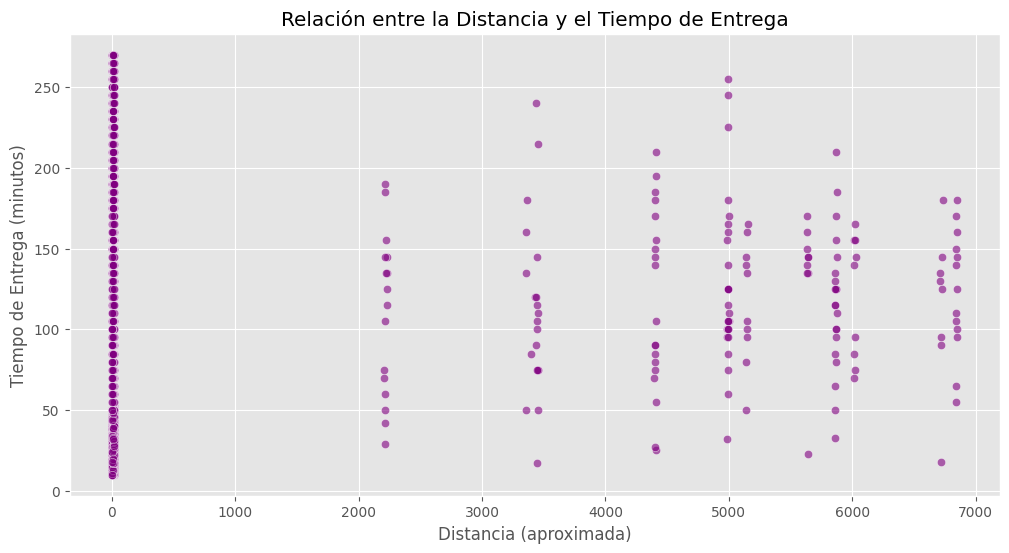

In [84]:
# Relación entre la distancia y el tiempo de entrega
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Distance', y='Delivery_Time', data=df_cleaned, alpha=0.6, color='purple')
plt.title('Relación entre la Distancia y el Tiempo de Entrega')
plt.xlabel('Distancia (aproximada)')
plt.ylabel('Tiempo de Entrega (minutos)')
plt.show()

#Análisis del Gráfico 3 Relación entre la distancia y el tiempo de entrega

**Conclusión**

A mayor distancia, se observa un ligero incremento en los tiempos de entrega. Sin embargo, hay dispersión en distancias cortas, indicando que otros factores (tráfico o clima) también impactan en la eficiencia.



**Recomendación**


Optimizar rutas para minimizar distancias y analizar casos de tiempos elevados, cuellos de botella no relacionados con la distancia para identificar posibles causas.

#5: Distribución del Tiempo de Entrega por Categoría de Producto

<ipython-input-85-50038f3e04a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Delivery_Time', data=df_cleaned, palette="Set3")


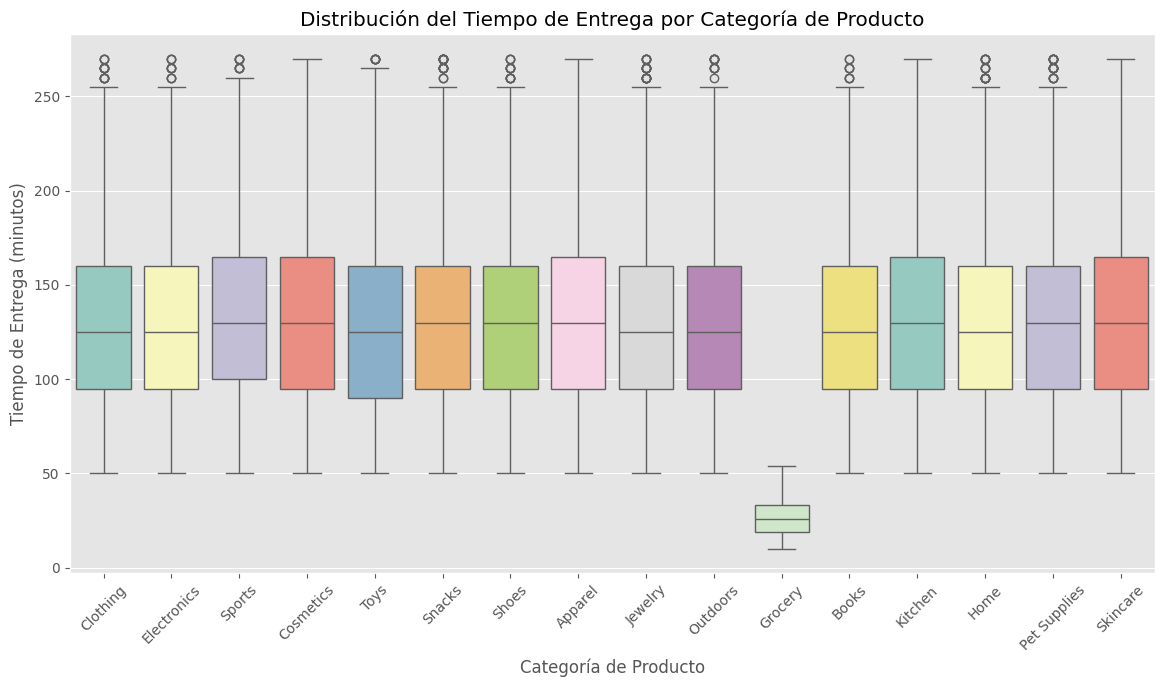

In [85]:
# Distribución del tiempo de entrega por categoría de producto
plt.figure(figsize=(14, 7))
sns.boxplot(x='Category', y='Delivery_Time', data=df_cleaned, palette="Set3")
plt.title('Distribución del Tiempo de Entrega por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Tiempo de Entrega (minutos)')
plt.xticks(rotation=45)
plt.show()

#Análisis del Grafico 5: Distribución del Tiempo de Entrega por Categoría de Producto

**Conclusión**


Las categorías de productos como "Groceries" tienen tiempos de entrega más consistentes y bajos, mientras que otras categorías presentan alta variabilidad. Esto podría deberse a diferencias en manejo o prioridad logística..

**Recomendación**


Revisar procesos logísticos para categorías con tiempos altos, optimizando inventarios y priorizando la asignación de entregas.
Ajustar la prioridad de entregas según la categoría del producto, optimizando especialmente para categorías con alta variabilidad.